<h1>Table of Contents<span class="tocSkip"></span></h1>


# Introduction


**What?** ARIMA model for forecasting



# What is ARIMA?


- **ARIMA** is an acronym that stands for AutoRegressive Integrated Moving Average. 
- It is a class of model that captures a suite of different standard temporal structures in time series data.
- The parameters of the ARIMA model are defined as follows: 
    - **p**: The number of lag observations included in the model, also called the lag order. 
    - **d**: The number of times that the raw observations are differenced, also called the degree of differencing. 
    - **q**: The size of the moving average window, also called the order of moving average. 
<br><br>
- An extension to ARIMA that supports the direct modelling of the seasonal component of the series is called **SARIMA**. 



# ARIMA or XGBoost for time series?


- **ARIMA** regressions are used in classical statistical approaches, when the goal is not just prediction, but also understanding on how different explanatory variables relate with the dependent variable and with each other. ARIMA are thought specifically for time series data.
- **XGBoost** models are used in pure ML approaches, where we exclusively care about quality of prediction. XGBoost regressors can be used for time series forecast, even though they are not specifically meant for long term forecasts. But they can work.



# Import modules

In [1]:
from pandas import read_csv
from datetime import datetime
from matplotlib import pyplot
from pandas.plotting import autocorrelation_plot
from pandas import DataFrame
#from statsmodels.tsa.arima_model import ARIMA
from statsmodels.tsa.arima.model import ARIMA
from math import sqrt
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
from matplotlib import rcParams
import matplotlib as mpl

rcParams['figure.figsize'] = 15, 5
rcParams['font.size'] = 20

# Getting rid of the warning messages
import warnings
warnings.filterwarnings("ignore")

# Import the dataset

In [2]:
# load dataset
def parser(x):
    return datetime.strptime('190'+x, '%Y-%m')
series = read_csv('../../DATASETS/shampoo.csv', header=0, index_col=0, parse_dates=True, squeeze=True, date_parser=parser)


In [3]:
series

Month
1901-01-01    266.0
1901-02-01    145.9
1901-03-01    183.1
1901-04-01    119.3
1901-05-01    180.3
1901-06-01    168.5
1901-07-01    231.8
1901-08-01    224.5
1901-09-01    192.8
1901-10-01    122.9
1901-11-01    336.5
1901-12-01    185.9
1902-01-01    194.3
1902-02-01    149.5
1902-03-01    210.1
1902-04-01    273.3
1902-05-01    191.4
1902-06-01    287.0
1902-07-01    226.0
1902-08-01    303.6
1902-09-01    289.9
1902-10-01    421.6
1902-11-01    264.5
1902-12-01    342.3
1903-01-01    339.7
1903-02-01    440.4
1903-03-01    315.9
1903-04-01    439.3
1903-05-01    401.3
1903-06-01    437.4
1903-07-01    575.5
1903-08-01    407.6
1903-09-01    682.0
1903-10-01    475.3
1903-11-01    581.3
1903-12-01    646.9
Name: Sales, dtype: float64

Month
1901-01-01    266.0
1901-02-01    145.9
1901-03-01    183.1
1901-04-01    119.3
1901-05-01    180.3
Name: Sales, dtype: float64


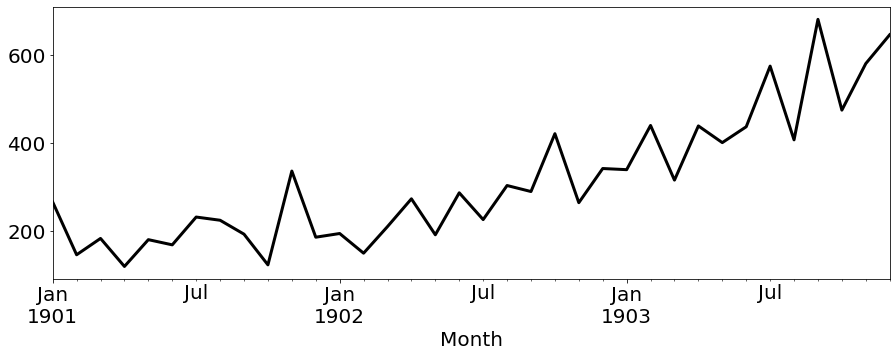

In [4]:
# summarize first few rows
print(series.head())
# line plot
series.plot(c = "k", lw = 3)
pyplot.show()

# Autocorrelation


- We can see that the Shampoo Sales dataset has a clear trend. 
- This suggests that the time series is **not stationary** and will require **differencing** to make it stationary, at least a difference order of 1. 
- Let’s also take a quick look at an autocorrelation plot of the time series.
- Running the example, we can see that there is a positive correlation with the first 10-to-12 lags that is perhaps significant for the first 5 lags. 
- A good starting point for the AR parameter of the model may be 5.



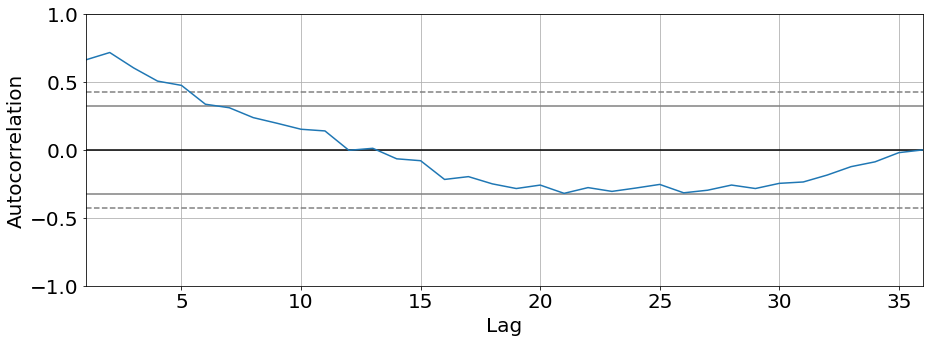

In [5]:
# Plotting
autocorrelation_plot(series)
pyplot.show()

# Building the model - ARIMA


- First, we fit an ARIMA(5,1,0) model. 
    - Lag value to 5 for autoregression
    - Difference order of 1 
    - Moving average model of 0. 



In [1]:
# fit model
model = ARIMA(series, order=(5,1,0))
model_fit = model.fit()

# summary of fit model
print(model_fit.summary())

NameError: name 'ARIMA' is not defined

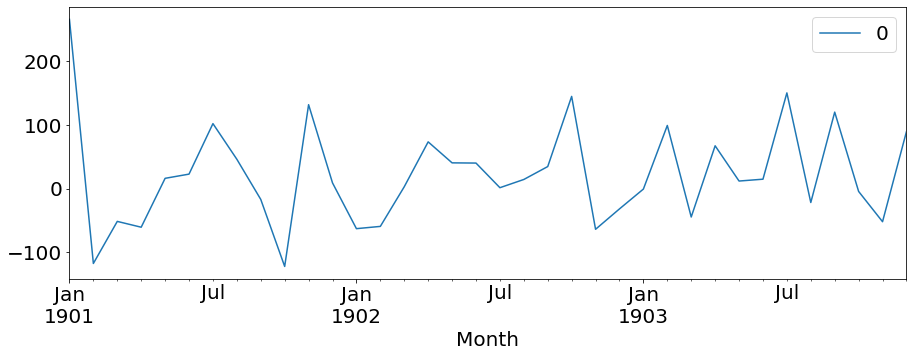

In [7]:
# line plot of residuals
residuals = DataFrame(model_fit.resid) 
residuals.plot();

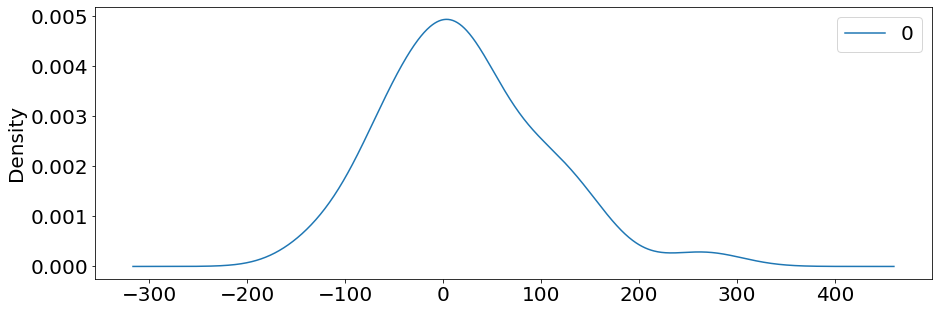

                0
count   36.000000
mean    21.936144
std     80.774430
min   -122.292030
25%    -35.040859
50%     13.147218
75%     68.848286
max    266.000000


In [8]:
# density plot of residuals 
residuals.plot(kind = 'kde') 
pyplot.show()
# summary stats of residuals
print(residuals.describe());


- We get a density plot of the residual error values, suggesting the errors are Gaussian, but may not be centered on zero. 
- The results show that indeed there is a bias in the prediction (a non-zero mean in the residuals).
- **Note**, that although above we used the entire dataset for time series analysis, ideally we would perform this analysis on just the training dataset when developing a predictive model.



# Rolling Forecast ARIMA Model


- The ARIMA model can be used to forecast future time steps.
- We can see the values show some trend and are in the correct scale. 
- The model could use further tuning of the p, d, and maybe even the q parameters.



In [9]:
# split into train and test sets
X = series.values
size = int(len(X) * 0.66)
train, test = X[0:size], X[size:len(X)]
history = [x for x in train]
predictions = list()

# walk-forward validation
for t in range(len(test)):
    model = ARIMA(history, order=(5,1,0))
    model_fit = model.fit()
    output = model_fit.forecast()
    yhat = output[0]
    predictions.append(yhat)
    obs = test[t]
    history.append(obs)
    print('predicted=%f, expected=%f' % (yhat, obs))   

predicted=343.272180, expected=342.300000
predicted=293.329674, expected=339.700000
predicted=368.668956, expected=440.400000
predicted=335.044741, expected=315.900000
predicted=363.220222, expected=439.300000
predicted=357.645324, expected=401.300000
predicted=443.047835, expected=437.400000
predicted=378.365674, expected=575.500000
predicted=459.415021, expected=407.600000
predicted=526.890876, expected=682.000000
predicted=457.231274, expected=475.300000
predicted=672.914944, expected=581.300000
predicted=531.541449, expected=646.900000


In [10]:
# evaluate forecasts
rmse = sqrt(mean_squared_error(test, predictions)) 
print('Test RMSE: %.3f' % rmse)

Test RMSE: 89.021


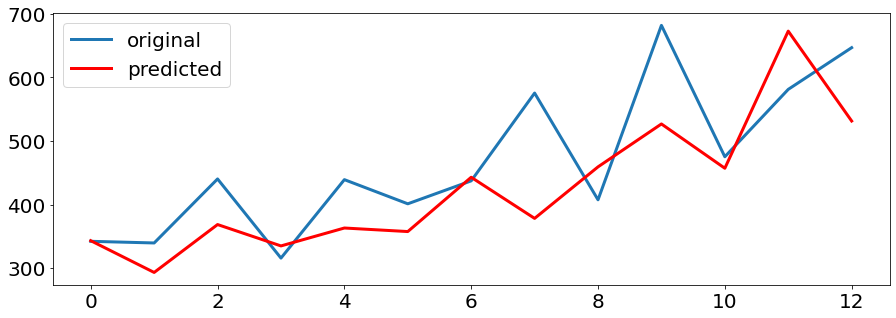

In [11]:
# plot forecasts against actual outcomes 
pyplot.plot(test, lw = 3, label = "original")
pyplot.plot(predictions, lw = 3, color='red', label = "predicted") 
pyplot.legend()
pyplot.show() 

# Conclusions


- You must always turn a non-stationary time series into a **stationary** one. 



# References


- Introduction to time series forecasting with python, Jason Brownlee
- [ARIMA vs. XGBoost](https://datascience.stackexchange.com/questions/60678/xgboost-vs-arima-for-time-series-analysis )
    
